# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.RECOUNT2

In [3]:
# ENRICH_FUNCTION = "enrichGO"

In [4]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [5]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [6]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [7]:
# SIMILARITY_MATRICES_DIR = DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [8]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [9]:
INPUT_FILE = DATASET_CONFIG["GENE_ENRICHMENT_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/recount2/gene_set_enrichment/recount_data_prep_PLIER-gene_set_enrichment.pkl')

# Load data

In [10]:
df = pd.read_pickle(INPUT_FILE)

In [11]:
df.shape

(1247015, 19)

In [12]:
df.columns

Index(['n_clusters', 'cluster_id', 'go_term_id', 'go_term_desc', 'gene_count',
       'gene_total', 'gene_ratio', 'bg_count', 'bg_total', 'bg_ratio',
       'pvalue', 'fdr_per_partition', 'corr_method', 'clust_method',
       'enrich_func', 'enrich_params', 'rich_factor', 'fold_enrich', 'fdr'],
      dtype='object')

In [13]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    tmp = df.head()
    display(tmp)

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,pvalue,fdr_per_partition,corr_method,clust_method,enrich_func,enrich_params,rich_factor,fold_enrich,fdr
0,2,C1,GO:0006954,inflammatory response,365,3057,0.119398,454,6519,0.069643,3.274320e-52,1.562178e-48,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.803965,1.714441,6.924073e-50
1,2,C0,GO:0006396,RNA processing,343,3462,0.099076,393,6519,0.060285,4.199581e-50,2.020839e-46,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.872774,1.643446,8.120547e-48
2,2,C0,GO:0006412,translation,322,3462,0.093010,376,6519,0.057678,4.688221e-43,1.127986e-39,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.856383,1.612583,6.488660e-41
3,2,C0,GO:0043043,peptide biosynthetic process,330,3462,0.095321,391,6519,0.059979,3.054631e-41,4.899628e-38,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.843990,1.589246,3.857779e-39
4,2,C1,GO:0007186,G protein-coupled receptor signaling pathway,322,3057,0.105332,419,6519,0.064274,2.778931e-38,6.629140e-35,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.768496,1.638805,3.029963e-36


# QQ plot

In [14]:
# CLUSTERMATCH_METHOD = "clustermatch_k2"
CLUSTERMATCH_METHOD = "clustermatch_k2to5"

In [15]:
PERFORMANCE_MEASURE = "fdr"
# PERFORMANCE_MEASURE = "rich_factor"
# PERFORMANCE_MEASURE = "fold_enrich"
# PERFORMANCE_MEASURE = "gene_ratio"

In [16]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [17]:
df["enrich_params"].unique()

['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']
Categories (6, object): ['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']

In [18]:
df_subset = df[
    (np.ones(df.shape[0]).astype(bool))
    & (df.fdr < 0.05)  # only significant results
    #     & (df.tissue == "adipose_subcutaneous")
    & (df.clust_method == "SpectralClustering")
    & (df.enrich_func == "enrichGO")
    & (df.enrich_params.str.contains("_full"))
]

In [19]:
assert df_subset["fdr"].max() < 0.05

In [20]:
df_subset.shape

(881424, 19)

In [21]:
df_subset.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,pvalue,fdr_per_partition,corr_method,clust_method,enrich_func,enrich_params,rich_factor,fold_enrich,fdr
0,2,C1,GO:0006954,inflammatory response,365,3057,0.119398,454,6519,0.069643,3.274320e-52,1.562178e-48,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.803965,1.714441,6.924073e-50
1,2,C0,GO:0006396,RNA processing,343,3462,0.099076,393,6519,0.060285,4.199581e-50,2.020839e-46,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.872774,1.643446,8.120547e-48
2,2,C0,GO:0006412,translation,322,3462,0.093010,376,6519,0.057678,4.688221e-43,1.127986e-39,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.856383,1.612583,6.488660e-41
3,2,C0,GO:0043043,peptide biosynthetic process,330,3462,0.095321,391,6519,0.059979,3.054631e-41,4.899628e-38,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.843990,1.589246,3.857779e-39
4,2,C1,GO:0007186,G protein-coupled receptor signaling pathway,322,3057,0.105332,419,6519,0.064274,2.778931e-38,6.629140e-35,clustermatch_k2,SpectralClustering,enrichGO,BP_full,0.768496,1.638805,3.029963e-36


In [22]:
df_methods = df_subset["corr_method"].unique()
display(df_methods)

['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [23]:
results_per_method = {}

for m in df_methods:
    df_values = df_subset[df_subset.corr_method == m][PERFORMANCE_MEASURE]
    display(f"{m} - {df_values.shape[0]}")

    if PERFORMANCE_MEASURE == "fdr":
        df_values = -np.log10(df_values)

    results_per_method[m] = df_values.quantile(QUANTILES).to_numpy()

'clustermatch_k2 - 150536'

'clustermatch_k2to5 - 144471'

'pearson_abs - 126803'

'pearson_full - 124406'

'spearman_abs - 167116'

'spearman_full - 168092'

In [24]:
quantiles_df = pd.DataFrame(results_per_method)

In [25]:
quantiles_df.shape

(10000, 6)

In [26]:
quantiles_df.head()

,clustermatch_k2,clustermatch_k2to5,pearson_abs,pearson_full,spearman_abs,spearman_full
0,1.316879,1.315865,1.303527,1.389099,1.315865,1.306657
1,1.342333,1.363826,1.342333,1.470911,1.338827,1.371290
2,1.352631,1.408733,1.355959,1.499058,1.342333,1.408215
3,1.359514,1.427183,1.363183,1.515980,1.352631,1.426436
4,1.363183,1.437181,1.363183,1.524627,1.360794,1.436179


In [27]:
quantiles_df.tail()

,clustermatch_k2,clustermatch_k2to5,pearson_abs,pearson_full,spearman_abs,spearman_full
9995,123.707862,123.765100,62.128069,79.006764,122.878907,122.626842
9996,125.754251,125.464313,65.794823,80.223720,128.162785,125.321263
9997,128.346136,128.389321,69.625604,82.151326,131.298506,128.283693
9998,132.210236,130.577864,77.173810,87.480989,134.385895,131.388490
9999,139.434650,136.204876,86.145928,98.682503,143.179975,138.845413


In [28]:
quantiles_df.describe()

,clustermatch_k2,clustermatch_k2to5,pearson_abs,pearson_full,spearman_abs,spearman_full
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.218684,5.327228,4.899812,4.882185,5.123292,5.493006
std,7.370727,7.492985,4.957156,5.420245,7.485166,7.527746
min,1.316879,1.315865,1.303527,1.389099,1.315865,1.306657
25%,2.674241,2.746342,2.587625,2.738079,2.617015,2.736493
50%,3.361470,3.429076,3.319317,3.393728,3.321313,3.464268
75%,4.973952,5.012177,4.996307,4.860546,4.850492,5.250299
max,139.434650,136.204876,86.145928,98.682503,143.179975,138.845413


Text(0.5, 1.0, 'Gene Ontology (fdr)')

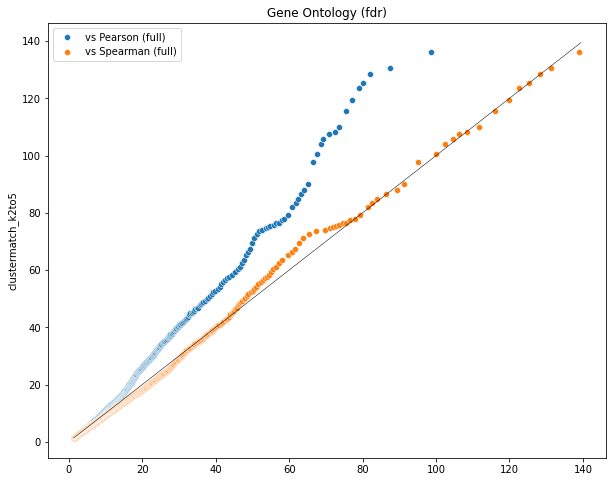

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (full)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (full)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

Text(0.5, 1.0, 'Gene Ontology (fdr)')

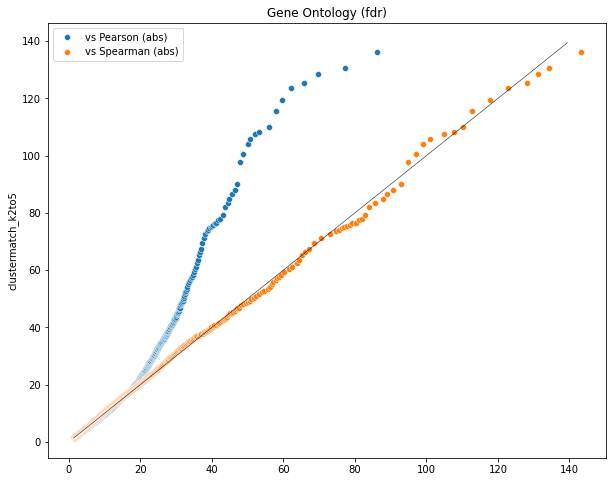

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (abs)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (abs)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

**UPDATE**

Clustermatch (multi pattern) outperforms pearson (linear and abs), although pearson find most significant associations towards the
right end of the distribution.

However, Clustermatch does not outperform spearman (monotonic and abs), which provides more significant results across the entire distribution.